# Dense Neural Network for Text Classification

## Preliminaries

### Imports

In [1]:
import os
import pickle 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
print(tf.__version__)


%matplotlib inline

import sys
sys.path.append("../..")

from E4525_ML import text


/home/manel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.11.0


In [2]:
seed=456
np.random.seed(seed)

### Data

In [3]:
reviews_filename="../../raw/amazon-reviews/Reviews.csv"

In [4]:
data=pd.read_csv(reviews_filename)

In [5]:
data_dir=r"../../data/amazon-reviews"

### Split into Train, Validation and Test Sets

In [6]:
documents_all=data["Text"].as_matrix()
labels_all=data["Score"].as_matrix()
print(documents_all.shape)

(568454,)


In [7]:
docs,docs_test,labels,labels_test=train_test_split(documents_all,labels_all,test_size=0.1)
print(docs.shape,docs_test.shape)

(511608,) (56846,)


In [8]:
docs_train,docs_val,labels_train,labels_val=train_test_split(docs,labels,test_size=0.05)
print(docs_train.shape,docs_val.shape)

(486027,) (25581,)


In [9]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/manel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/manel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Text Embedding Pipeline

In [10]:
countVectorizer=TfidfVectorizer(input="content",decode_error="ignore",
                                       max_features=50000,
                                       #tokenizer=text.stem_tokenizer,
                                       #stop_words=text.stop_words()
                               )
dencoder=text.DocumentEncoder(countVectorizer)


In [11]:
pickle_filename=data_dir+"/amazon_reviews.p"
if True:
    texts_train=dencoder.fit_transform(docs_train)
    texts_val=dencoder.transform(docs_val)
    texts_test=dencoder.transform(docs_test)
    
    file=open(pickle_filename,"wb")
    pickle.dump((countVectorizer,texts_train,labels_train,texts_val,labels_val,texts_test,labels_test),file)
    file.close()
else:
    file=open(pickle_filename,"rb")
    countVectorizer,texts_train,labels_train,texts_val,labels_val,texts_test,labels_test=pickle.load(file)
    file.close()
print(texts_train.shape,texts_val.shape,texts_test.shape)

(486027,) (25581,) (56846,)


In [12]:
ltexts=[len(text) for text in texts_train]

(array([ 66793., 159835.,  94500.,  56948.,  34429.,  22415.,  14285.,
          9634.,   6959.,   4860.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.]),
 <a list of 10 Patch objects>)

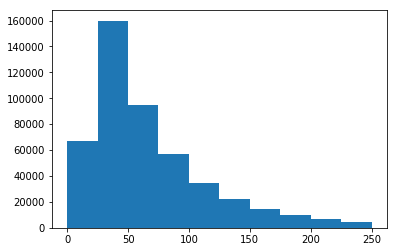

In [13]:
plt.hist(ltexts,range=[0,250])

In [14]:
def pad_texts(texts,W):
    fragments=[]
    fragment_labels=[]
    for idx,text in enumerate(texts):
            fragment=text[0:W]
            fragment=np.pad(fragment,(W-len(fragment),0),mode="constant",constant_values=-2)
            fragments.append(fragment)
    return np.array(fragments)

In [15]:
W=125

In [16]:
X_train=pad_texts(texts_train,W)
Y_train=labels_train>3
print(X_train.shape,Y_train.shape)

(486027, 125) (486027,)


In [17]:
X_val=pad_texts(texts_val,W)
Y_val=labels_val>3
print(X_val.shape,Y_val.shape)

(25581, 125) (25581,)


In [18]:

X_test=pad_texts(texts_test,W)
Y_test=labels_test>3
print(X_test.shape,Y_test.shape)

(56846, 125) (56846,)


In [19]:
X_train[0]

array([-2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00,
       -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00,
       -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00,
       -2.0000e+00, -2.0000e+00, -2.0000e+00, -2.0000e+00,  4.4839e+04,
        1.0765e+04,  4.8210e+04,  3.5747e+04,  2.3155e+04,  4.4669e+04,
        3.2617e+04,  6.2360e+03,  1.8644e+04,  2.9720e+04,  2.2655e+04,
        1.5654e+04,  4.5233e+04,  1.0317e+04,  6.5730e+03,  2.9720e+04,
        1.1753e+04,  3.0350e+04,  2.6865e+04,  3.0000e+04,  2.4270e+04,
        2.0997e+04,  8.7540e+03,  2.7641e+04,  4.3350e+03,  4.0171e+04,
        2.3155e+04,  4.4669e+04,  3.2617e+04,  2.2284e+04,  4.4656e+04,
        4.9292e+04,  6.0480e+03,  1.8440e+03,  4.5233e+04,  4.2263e+04,
        4.4695e+04,  4.7108e+04,  2.5500e+03,  2.3155e+04,  4.4669e+04,
        1.9348e+04,  8.3380e+03,  4.6697e+04,  4.4656e+04,  4.8229e+04,
        4.4669e+04,  9.1410e+03,  1.6973e+04,  8.7540e+03,  4.46

In [20]:
X_train.max(),X_train.min()

(49999.0, -2.0)

In [21]:
Y_test.mean()

0.7829926468001267

## Text Embedding Model

This model is equivalent to logistic regression on the Counts features.

In [22]:
class AggregationLayer(keras.layers.Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(AggregationLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.bias = self.add_weight(name='bias', 
                                      shape=(self.output_dim,),
                                      initializer='uniform',
                                      trainable=True)
        super(AggregationLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, x):
        logits=K.sum(x,axis=1)+self.bias
        return keras.activations.softmax(logits)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

In [23]:
def embedded_logistic_net(W,V,E):
    model=keras.Sequential(
        [
            keras.layers.Lambda(lambda x: x+2,input_shape=(W,)), # add two to handle padding and unknown words
            keras.layers.Embedding(V,E,input_length=W),
            AggregationLayer(E),
        ]
    )
    return model

In [24]:
V=len(countVectorizer.vocabulary_)+2 # one for unknown words, one for padding
E=2
print(V,W,E)

50002 125 2


In [25]:
model0=embedded_logistic_net(W,V,E)

In [26]:
model0.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 125)               0         
_________________________________________________________________
embedding (Embedding)        (None, 125, 2)            100004    
_________________________________________________________________
aggregation_layer (Aggregati (None, 2)                 2         
Total params: 100,006
Trainable params: 100,006
Non-trainable params: 0
_________________________________________________________________


In [27]:
nepochs=20

In [28]:
result0=model0.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=nepochs,batch_size=5000,verbose=2)

Train on 486027 samples, validate on 25581 samples
Epoch 1/20


/home/manel/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


 - 4s - loss: 0.5013 - acc: 0.7588 - val_loss: 0.3940 - val_acc: 0.8148
Epoch 2/20
 - 5s - loss: 0.3558 - acc: 0.8379 - val_loss: 0.3357 - val_acc: 0.8509
Epoch 3/20
 - 4s - loss: 0.3135 - acc: 0.8637 - val_loss: 0.3081 - val_acc: 0.8691
Epoch 4/20
 - 4s - loss: 0.2904 - acc: 0.8771 - val_loss: 0.2924 - val_acc: 0.8768
Epoch 5/20
 - 4s - loss: 0.2756 - acc: 0.8859 - val_loss: 0.2821 - val_acc: 0.8825
Epoch 6/20
 - 4s - loss: 0.2651 - acc: 0.8917 - val_loss: 0.2751 - val_acc: 0.8858
Epoch 7/20
 - 4s - loss: 0.2572 - acc: 0.8962 - val_loss: 0.2698 - val_acc: 0.8895
Epoch 8/20
 - 4s - loss: 0.2510 - acc: 0.8993 - val_loss: 0.2659 - val_acc: 0.8918
Epoch 9/20
 - 4s - loss: 0.2459 - acc: 0.9017 - val_loss: 0.2629 - val_acc: 0.8934
Epoch 10/20
 - 4s - loss: 0.2417 - acc: 0.9036 - val_loss: 0.2602 - val_acc: 0.8949
Epoch 11/20
 - 4s - loss: 0.2381 - acc: 0.9054 - val_loss: 0.2582 - val_acc: 0.8954
Epoch 12/20
 - 5s - loss: 0.2349 - acc: 0.9071 - val_loss: 0.2567 - val_acc: 0.8963
Epoch 13/20


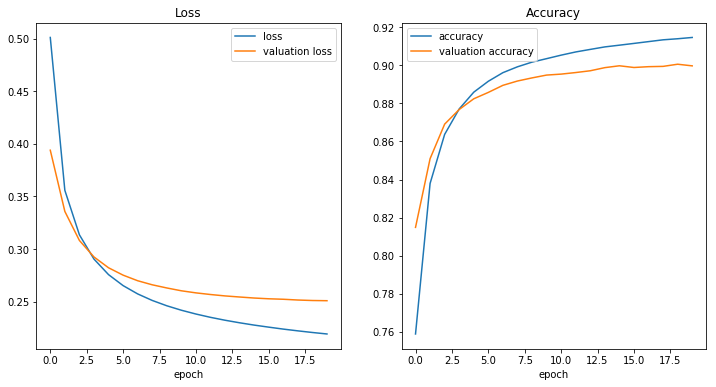

In [29]:
history=result0.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [31]:
Y_pred=np.argmax(model0.predict(X_val),axis=-1)
np.mean(Y_pred==Y_val)

0.8997693600719284

## Dense Neural Network

### Build Dense Neural Network

In [32]:
def text_dnn_net(W,V,E,hidden1,hidden2,dropout):
    model=keras.Sequential(
        [
            keras.layers.Lambda(lambda x: x+2,input_shape=(W,)), # add two to handle padding and unknown words
            keras.layers.Embedding(V,E,input_length=W,
                                   #embeddings_initializer=keras.initializers.RandomUniform(minval=-1, maxval=1)
                                  ),
            keras.layers.Flatten(),
            keras.layers.Dropout(dropout),
            keras.layers.Dense(hidden1,activation="relu"),
            keras.layers.Dense(hidden2,activation="relu"),
            keras.layers.Dropout(dropout),
            keras.layers.Dense(2,activation="softmax")
        ]
    )
    return model

In [33]:
dropout=0.5
hidden1=128
hidden2=64
E=15

In [34]:
model1=text_dnn_net(W,V,E,hidden1,hidden2,dropout)
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 125)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 125, 15)           750030    
_________________________________________________________________
flatten (Flatten)            (None, 1875)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1875)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               240128    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [35]:
result1=model1.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=nepochs,batch_size=5000,verbose=2)

/home/manel/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 486027 samples, validate on 25581 samples
Epoch 1/20
 - 19s - loss: 0.4335 - acc: 0.8026 - val_loss: 0.2782 - val_acc: 0.8791
Epoch 2/20
 - 19s - loss: 0.2665 - acc: 0.8905 - val_loss: 0.2410 - val_acc: 0.8997
Epoch 3/20
 - 21s - loss: 0.2367 - acc: 0.9048 - val_loss: 0.2349 - val_acc: 0.9036
Epoch 4/20
 - 20s - loss: 0.2190 - acc: 0.9134 - val_loss: 0.2198 - val_acc: 0.9113
Epoch 5/20
 - 19s - loss: 0.2044 - acc: 0.9194 - val_loss: 0.2154 - val_acc: 0.9131
Epoch 6/20
 - 20s - loss: 0.1931 - acc: 0.9244 - val_loss: 0.2102 - val_acc: 0.9167
Epoch 7/20
 - 19s - loss: 0.1829 - acc: 0.9290 - val_loss: 0.2090 - val_acc: 0.9181
Epoch 8/20
 - 20s - loss: 0.1737 - acc: 0.9323 - val_loss: 0.2083 - val_acc: 0.9187
Epoch 9/20
 - 19s - loss: 0.1654 - acc: 0.9354 - val_loss: 0.2129 - val_acc: 0.9190
Epoch 10/20
 - 19s - loss: 0.1585 - acc: 0.9387 - val_loss: 0.2109 - val_acc: 0.9201
Epoch 11/20
 - 20s - loss: 0.1529 - acc: 0.9409 - val_loss: 0.2182 - val_acc: 0.9178
Epoch 12/20
 - 20s - lo

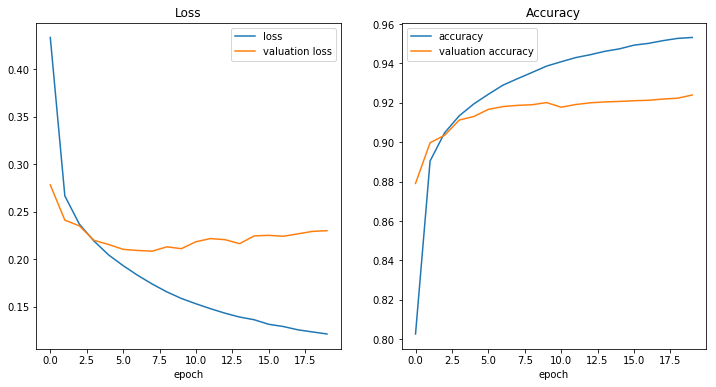

In [36]:
history=result1.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

### layer size optimization

In [37]:
results=[]
for E in [10,15]:
  for hidden1 in [128,256]:
    for hidden2 in [64,128,256]:
        # Build the Estimator
        model = text_dnn_net(W,V,E,hidden1,hidden2,dropout)
        model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
        model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=nepochs,batch_size=5000,verbose=2)
        Y_pred=np.argmax(model.predict(X_train),axis=-1)
        acc_train=np.mean(Y_pred==Y_train)
        Y_pred=np.argmax(model.predict(X_val),axis=-1)
        acc_val=np.mean(Y_pred==Y_val)
        print(E,hidden1,hidden2,acc_train,acc_val)
        results.append((E,hidden1,hidden2,acc_train,acc_val))
        

/home/manel/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 486027 samples, validate on 25581 samples
Epoch 1/20
 - 15s - loss: 0.4541 - acc: 0.7881 - val_loss: 0.3038 - val_acc: 0.8734
Epoch 2/20
 - 15s - loss: 0.2770 - acc: 0.8851 - val_loss: 0.2474 - val_acc: 0.8972
Epoch 3/20
 - 14s - loss: 0.2487 - acc: 0.8992 - val_loss: 0.2372 - val_acc: 0.9021
Epoch 4/20
 - 14s - loss: 0.2336 - acc: 0.9063 - val_loss: 0.2279 - val_acc: 0.9080
Epoch 5/20
 - 14s - loss: 0.2225 - acc: 0.9115 - val_loss: 0.2229 - val_acc: 0.9109
Epoch 6/20
 - 14s - loss: 0.2128 - acc: 0.9160 - val_loss: 0.2200 - val_acc: 0.9120
Epoch 7/20
 - 14s - loss: 0.2051 - acc: 0.9184 - val_loss: 0.2207 - val_acc: 0.9120
Epoch 8/20
 - 14s - loss: 0.1970 - acc: 0.9223 - val_loss: 0.2143 - val_acc: 0.9145
Epoch 9/20
 - 14s - loss: 0.1910 - acc: 0.9243 - val_loss: 0.2134 - val_acc: 0.9161
Epoch 10/20
 - 14s - loss: 0.1853 - acc: 0.9269 - val_loss: 0.2134 - val_acc: 0.9168
Epoch 11/20
 - 14s - loss: 0.1793 - acc: 0.9295 - val_loss: 0.2171 - val_acc: 0.9156
Epoch 12/20
 - 14s - lo

Epoch 13/20
 - 21s - loss: 0.1615 - acc: 0.9363 - val_loss: 0.2108 - val_acc: 0.9193
Epoch 14/20
 - 21s - loss: 0.1582 - acc: 0.9380 - val_loss: 0.2105 - val_acc: 0.9196
Epoch 15/20
 - 21s - loss: 0.1540 - acc: 0.9398 - val_loss: 0.2120 - val_acc: 0.9204
Epoch 16/20
 - 21s - loss: 0.1512 - acc: 0.9409 - val_loss: 0.2134 - val_acc: 0.9213
Epoch 17/20
 - 21s - loss: 0.1476 - acc: 0.9420 - val_loss: 0.2147 - val_acc: 0.9213
Epoch 18/20
 - 21s - loss: 0.1441 - acc: 0.9437 - val_loss: 0.2174 - val_acc: 0.9210
Epoch 19/20
 - 21s - loss: 0.1435 - acc: 0.9439 - val_loss: 0.2147 - val_acc: 0.9222
Epoch 20/20
 - 21s - loss: 0.1399 - acc: 0.9454 - val_loss: 0.2156 - val_acc: 0.9226
10 256 128 0.9732525147779856 0.9226378953129276
Train on 486027 samples, validate on 25581 samples
Epoch 1/20
 - 24s - loss: 0.4268 - acc: 0.8057 - val_loss: 0.2786 - val_acc: 0.8804
Epoch 2/20
 - 24s - loss: 0.2671 - acc: 0.8883 - val_loss: 0.2434 - val_acc: 0.8990
Epoch 3/20
 - 24s - loss: 0.2413 - acc: 0.9012 - val

Epoch 4/20
 - 31s - loss: 0.2184 - acc: 0.9129 - val_loss: 0.2173 - val_acc: 0.9126
Epoch 5/20
 - 31s - loss: 0.2043 - acc: 0.9190 - val_loss: 0.2123 - val_acc: 0.9162
Epoch 6/20
 - 31s - loss: 0.1917 - acc: 0.9247 - val_loss: 0.2082 - val_acc: 0.9167
Epoch 7/20
 - 31s - loss: 0.1808 - acc: 0.9290 - val_loss: 0.2064 - val_acc: 0.9192
Epoch 8/20
 - 30s - loss: 0.1707 - acc: 0.9334 - val_loss: 0.2057 - val_acc: 0.9184
Epoch 9/20
 - 31s - loss: 0.1622 - acc: 0.9367 - val_loss: 0.2149 - val_acc: 0.9184
Epoch 10/20
 - 31s - loss: 0.1567 - acc: 0.9390 - val_loss: 0.2078 - val_acc: 0.9214
Epoch 11/20
 - 31s - loss: 0.1502 - acc: 0.9416 - val_loss: 0.2118 - val_acc: 0.9220
Epoch 12/20
 - 31s - loss: 0.1453 - acc: 0.9440 - val_loss: 0.2149 - val_acc: 0.9204
Epoch 13/20
 - 31s - loss: 0.1388 - acc: 0.9464 - val_loss: 0.2239 - val_acc: 0.9190
Epoch 14/20
 - 31s - loss: 0.1355 - acc: 0.9476 - val_loss: 0.2138 - val_acc: 0.9215
Epoch 15/20
 - 31s - loss: 0.1303 - acc: 0.9499 - val_loss: 0.2206 - va

In [38]:
import pandas as pd

In [39]:
data=pd.DataFrame(results,columns=["E","layer1","layer2","train","valuation"])
data.head()

,E,layer1,layer2,train,valuation
0,10,128,64,0.968144,0.920683
1,10,128,128,0.968675,0.919354
2,10,128,256,0.969946,0.918416
3,10,256,64,0.970650,0.921192
4,10,256,128,0.973253,0.922638


In [40]:
data.to_csv(data_dir+"/DNN_Binary_Text_AmazonReviews.csv")
val_error=data[["E","layer1","layer2","valuation"]]

In [41]:
data["valuation"].max()

0.9257652163715258

In [42]:
best=data.iloc[data["valuation"].idxmax()]
best_E=int(best["E"])
best_hidden1=int(best["layer1"])
best_hidden2=int(best["layer2"])
best

E             15.000000
layer1       256.000000
layer2       256.000000
train          0.984404
valuation      0.925765
Name: 11, dtype: float64

The best model achieves 92.6% accuracy using and embedding of size 15, and two dense layers of $256\times 256$ units.

### Test of best model

In [43]:
model=text_dnn_net(W,V,best_E,best_hidden1,best_hidden2,dropout)

In [44]:
X=np.concatenate([X_train,X_val])
Y=np.concatenate([Y_train,Y_val])
print(X.shape,Y.shape,X_test.shape,Y_test.shape)

(511608, 125) (511608,) (56846, 125) (56846,)


In [45]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_14 (Lambda)           (None, 125)               0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 125, 15)           750030    
_________________________________________________________________
flatten_13 (Flatten)         (None, 1875)              0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 1875)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 256)               480256    
_________________________________________________________________
dense_40 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
__________

This model is a **very large**

In [46]:
model.fit(X,Y,validation_data=(X_test,Y_test),epochs=nepochs,batch_size=5000,verbose=2)  

/home/manel/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 511608 samples, validate on 56846 samples
Epoch 1/20
 - 37s - loss: 0.4024 - acc: 0.8144 - val_loss: 0.2610 - val_acc: 0.8915
Epoch 2/20
 - 36s - loss: 0.2545 - acc: 0.8947 - val_loss: 0.2326 - val_acc: 0.9064
Epoch 3/20
 - 36s - loss: 0.2288 - acc: 0.9071 - val_loss: 0.2222 - val_acc: 0.9107
Epoch 4/20
 - 36s - loss: 0.2117 - acc: 0.9153 - val_loss: 0.2129 - val_acc: 0.9163
Epoch 5/20
 - 36s - loss: 0.1972 - acc: 0.9212 - val_loss: 0.2096 - val_acc: 0.9172
Epoch 6/20
 - 36s - loss: 0.1837 - acc: 0.9270 - val_loss: 0.2053 - val_acc: 0.9208
Epoch 7/20
 - 36s - loss: 0.1725 - acc: 0.9322 - val_loss: 0.2052 - val_acc: 0.9206
Epoch 8/20
 - 36s - loss: 0.1626 - acc: 0.9358 - val_loss: 0.2028 - val_acc: 0.9225
Epoch 9/20
 - 36s - loss: 0.1560 - acc: 0.9388 - val_loss: 0.2079 - val_acc: 0.9246
Epoch 10/20
 - 36s - loss: 0.1473 - acc: 0.9422 - val_loss: 0.2059 - val_acc: 0.9241
Epoch 11/20
 - 36s - loss: 0.1418 - acc: 0.9446 - val_loss: 0.2091 - val_acc: 0.9254
Epoch 12/20
 - 36s - lo

In [47]:
Y_pred=np.argmax(model.predict(X_test),axis=-1)
np.mean(Y_pred==Y_test)

0.9266790979136614

So we achieve close to 92.7% accuracy on the test set